In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Customers.csv', sep = ';', decimal = ',')

In [4]:
df.head(10)

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
0,1,187,63,1,2349.06,2
1,2,96,10,6,922.62,4
2,3,47,35,4,881.22,3
3,4,294,5,1,3815.16,2
4,5,732,4,31,41868.11,29
5,6,37,16,3,2053.40,8
6,7,264,11,12,4861.49,12
7,8,188,4,8,4010.69,9
8,9,316,4,21,12636.80,20
9,10,528,5,18,17741.24,26


In [5]:
df.shape

(1511, 6)

In [6]:
df.isna().sum()

CustomerId    0
Profit        0
Recency       0
Frequency     0
Monetary      0
Variance      0
dtype: int64

In [7]:
df.drop(['CustomerId'], axis = 1, inplace = True)

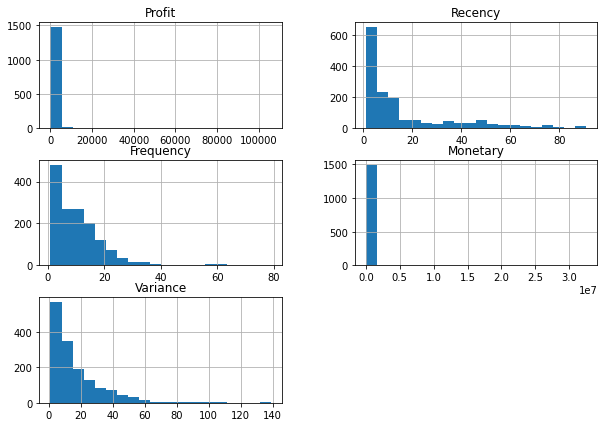

In [8]:
df.hist(figsize = (10,7), bins = 20)
plt.show()

In [9]:
X = df[['Profit', 'Recency', 'Frequency', 'Monetary', 'Variance']].to_numpy()

Z uwagi na to, że różne kolumny posiadają różne rzędy wartości wymagane jest skalowanie danych. Użyłem funkcji StandardScaler ponieważ w tym przypadku nie przeszkadzają mi wartości odstające takie jak np duża wartość 'Profit' gdyż tacy klienci mogą stworzyć oddzielną kategorię, a gdyby wszystkie wartości były podobne klasyfikacja nie miałaby dużego sensu.

In [10]:
X_scaled = StandardScaler().fit_transform(X)

Sprawdzenie, ile klas powinienem stworzyć:

In [11]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    inertia.append(kmeanModel.inertia_)

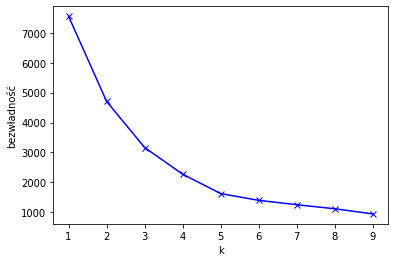

In [12]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('bezwładność')
plt.show()

Przyporządkowanie klientów do danych kateogrii:

In [44]:
kmeans = KMeans(n_clusters=4).fit(X_scaled)

In [106]:
labels = pd.DataFrame(kmeans.labels_)

df_labeled = pd.concat((df,labels),axis=1)

In [107]:
df_labeled.rename({0:'labels'}, axis=1, inplace = True)

In [108]:
for i in range(5):
    print(df_labeled[df_labeled['labels'] == i].head())

    Profit  Recency  Frequency   Monetary  Variance  labels
4      732        4         31   41868.11        29       0
8      316        4         21   12636.80        20       0
9      528        5         18   17741.24        26       0
25     957        3         22   35229.52        34       0
26    3858        3         52  114028.95        41       0
    Profit  Recency  Frequency  Monetary  Variance  labels
0      187       63          1   2349.06         2       1
2       47       35          4    881.22         3       1
18      36       40          7    774.44         5       1
19      26       59          3    251.98         2       1
20     156       32          4  11455.86        10       1
     Profit  Recency  Frequency     Monetary  Variance  labels
11    58457       11         13  25965518.20       110       2
50    67669        1         77  31966480.14       134       2
144   41189        2         65   6319742.34       103       2
399   45822        4         15  3

Można teraz sprawdzić rozkład klientów dla różnych argumentów, w tym przypadku 'Profit' od 'Variance':

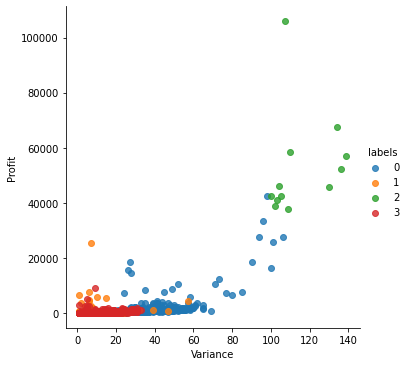

In [109]:
sns.lmplot(x = 'Variance', y='Profit',  data=df_labeled, hue='labels',fit_reg=False)

Oprócz tego wyświetlam średnie wartości kolumn dla każdej kategorii aby lepiej zorientowac się w tym, na jakich zasadach zotsały one przypisane.

In [110]:
for i in range(4):
    print('Kategoria ', i, '\n', df_labeled[df_labeled['labels'] == i].mean(axis=0),'\n')

Kategoria  0 
 Profit         1919.126404
Recency           5.109551
Frequency        21.598315
Monetary     125121.052388
Variance         36.834270
labels            0.000000
dtype: float64 

Kategoria  1 
 Profit         369.342466
Recency         50.681507
Frequency        2.667808
Monetary     28701.131575
Variance         5.061644
labels           1.000000
dtype: float64 

Kategoria  2 
 Profit       5.302917e+04
Recency      3.416667e+00
Frequency    5.533333e+01
Monetary     1.687035e+07
Variance     1.149167e+02
labels       2.000000e+00
dtype: float64 

Kategoria  3 
 Profit         280.030552
Recency          8.561692
Frequency        8.285546
Monetary     11318.355617
Variance        10.837838
labels           3.000000
dtype: float64 



Wprowadzenie opisu kategorii do tabeli:

In [111]:
df_labeled.insert(6, 'Type','none')

In [112]:
i = 0
for n in df_labeled['labels']:
    
    if n == 0:
        df_labeled.iloc[i, 6] = 'Regular customer'
    elif n ==1:
        df_labeled.iloc[i, 6] = 'Inactive customer' 
    elif n == 2:
        df_labeled.iloc[i, 6] = 'Profitable customer'
    elif n ==3:
        df_labeled.iloc[i, 6] = 'New customer'
    i+=1

In [113]:
df_labeled.insert(0, 'CustomerId',1)

In [126]:
i=1
for n in range(len(df_labeled['CustomerId'])):
    df_labeled.iloc[n, 0] = i
    i+=1    

In [129]:
df_labeled.head()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,labels,Type
0,1,187,63,1,2349.06,2,1,Inactive customer
1,2,96,10,6,922.62,4,3,New customer
2,3,47,35,4,881.22,3,1,Inactive customer
3,4,294,5,1,3815.16,2,3,New customer
4,5,732,4,31,41868.11,29,0,Regular customer


In [130]:
df_labeled.to_csv('Customers.csv', index = False)